### In this notebook, I will be exploring the 2017 Stack Overflow results in order to glean some information on professional developers and what to focus on to have the best career.

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import HowToBreakIntoTheField as t
%matplotlib inline

pd.set_option('display.max_columns', None)

df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

# Question 1: What is the most common languages, technologies, methodologies and tools used by professionals

### The data will be prepared here by selecting the desired columns and only using the rows where a professional devloper was taking the survey

In [109]:
q1 = df[['Professional', 'HaveWorkedLanguage', 'HaveWorkedFramework', 'HaveWorkedDatabase', 'Methodology']]

q1 = q1[q1.Professional == "Professional developer"]
q1 = q1.dropna(subset=['Professional'], axis=0)
q1.head()

,Professional,HaveWorkedLanguage,HaveWorkedFramework,HaveWorkedDatabase,Methodology
2,Professional developer,Java; PHP; Python,NaN,MySQL,Agile; Lean; Scrum; Extreme; Pair; Kanban
4,Professional developer,NaN,NaN,NaN,NaN
7,Professional developer,CoffeeScript; Clojure; Elixir; Erlang; Haskell...,React,Redis; MySQL; PostgreSQL,Agile; Pair; Kanban
8,Professional developer,C#; JavaScript,AngularJS; Node.js; .NET Core,SQL Server,Agile; Scrum; Pair; Kanban; Domain-driven design
9,Professional developer,Objective-C; Swift,NaN,PostgreSQL,Agile; Scrum; Pair; Kanban


### The most commonly used languages are displayed here

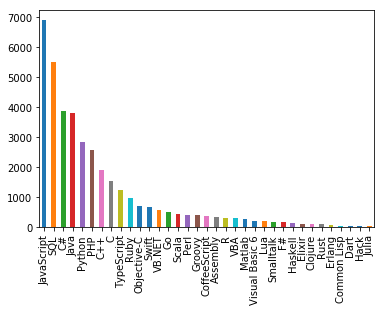

In [75]:
languages = q1['HaveWorkedLanguage'].str.split('; ', expand=True).stack().value_counts()
languages.plot(kind="bar")

### The most commonly used frameworks are displayed here

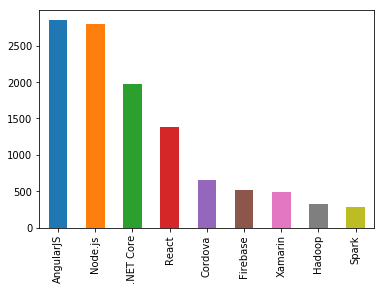

In [76]:
frameworks = q1['HaveWorkedFramework'].str.split('; ', expand=True).stack().value_counts()
frameworks.plot(kind="bar")

### The most commonly used databases are displayed here

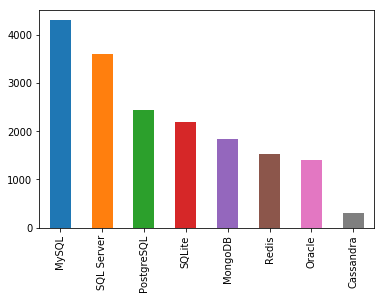

In [77]:
databases = q1['HaveWorkedDatabase'].str.split('; ', expand=True).stack().value_counts()

databases.plot(kind="bar")

### The most commonly used methodologies are displayed here

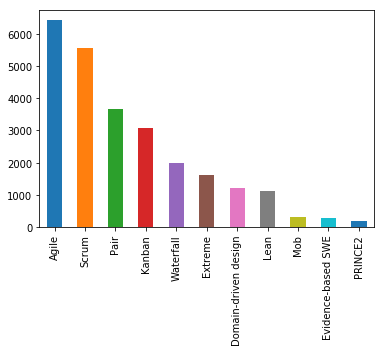

In [95]:
methodologies = q1['Methodology'].str.split('; ', expand=True).stack().value_counts()

methodologies.plot(kind="bar")

# Question 2:  What is the average salary for each programming language

### The data will be prepared here by selecting the desired columns and only using the rows where a professional devloper was taking the survey

In [104]:
q2 = df[['Professional', 'HaveWorkedLanguage', 'Salary']]

q2 = q2[q2.Professional == "Professional developer"]
q2 = q2.drop('Professional', 1)
q2 = q2.dropna(subset=['Salary', 'HaveWorkedLanguage'], axis=0)
q2.head()

,HaveWorkedLanguage,Salary
2,Java; PHP; Python,113750.0
14,Assembly; C; C++,100000.0
17,C; Clojure; JavaScript; Matlab; Rust; SQL; Swift,130000.0
22,Java,100764.0
25,Java; Scala,175000.0


In [105]:
def split_column(column_to_split, delimeter, column_to_store, df):
    """
    Method to split a columns values by a provided delimeter while
    retaining the associated value of another column.
    
    :param str column_to_split: column whose values are to be split
    :param str delimeter: delimeter to split by
    :param str columns_to_store: column who's data must be stored along split rows
    :param DataFrame df: dataframe to use
    """
    split_col = pd.DataFrame(columns = [column_to_split, column_to_store])
    for index, row in df.iterrows():
        columns = row[column_to_split].split(delimeter)
        for c in columns:
            split_col.loc[len(split_col)] = [c, row[column_to_store]]
    return split_col

In [106]:
split_languages = split_column("HaveWorkedLanguage", "; ", "Salary", q2)
split_languages.head()

,HaveWorkedLanguage,Salary
0,Java,113750.0
1,PHP,113750.0
2,Python,113750.0
3,Assembly,100000.0
4,C,100000.0


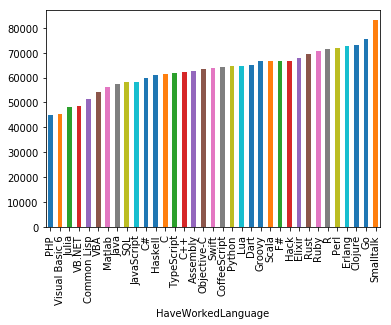

In [108]:
q2_answer = split_languages.groupby(['HaveWorkedLanguage']).mean()['Salary'].sort_values()
q2_answer.plot(kind = 'bar')


# Question 3: Which programming language has the highest job satisfaction

### The data will be prepared here by selecting the desired columns and only using the rows where a professional devloper was taking the survey

In [64]:
q3 = df[['Professional', 'HaveWorkedLanguage', 'JobSatisfaction']]

q3 = q3[q3.Professional == "Professional developer"]
q3 = q3.drop('Professional', 1)
q3 = q3.dropna(subset=['JobSatisfaction', 'HaveWorkedLanguage'], axis=0)
q3.head()

,HaveWorkedLanguage,JobSatisfaction
2,Java; PHP; Python,9.0
7,CoffeeScript; Clojure; Elixir; Erlang; Haskell...,7.0
8,C#; JavaScript,6.0
9,Objective-C; Swift,8.0
13,Java; JavaScript; Ruby; SQL,6.0


In [111]:
split_languages_q3 = split_column("HaveWorkedLanguage", "; ", "JobSatisfaction", q3)

In [112]:
q3_answer = split_languages_q3.groupby(['HaveWorkedLanguage']).mean()['JobSatisfaction'].sort_values()
q3_answer.head(50)

HaveWorkedLanguage
Visual Basic 6    6.877934
VB.NET            6.975970
VBA               7.000000
Perl              7.045333
Java              7.050697
SQL               7.056984
PHP               7.061347
C#                7.061877
Clojure           7.076923
JavaScript        7.096789
C                 7.111556
Groovy            7.122396
Rust              7.123894
Ruby              7.132231
C++               7.139710
R                 7.153584
Python            7.197758
Haskell           7.209302
Swift             7.228659
Matlab            7.262774
Lua               7.266667
F#                7.278481
TypeScript        7.284790
Common Lisp       7.285714
Go                7.303462
CoffeeScript      7.310249
Scala             7.320276
Assembly          7.350148
Elixir            7.358333
Julia             7.391304
Objective-C       7.403983
Dart              7.424242
Erlang            7.432432
Smalltalk         7.493750
Hack              7.666667
Name: JobSatisfaction, dtype: float6

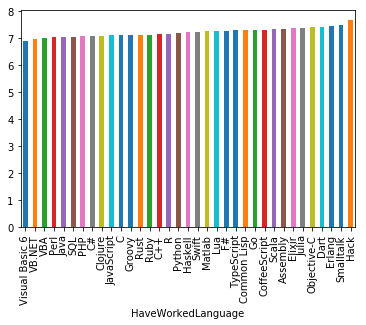

In [113]:
q3_answer.plot(kind = 'bar')